In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
pd.pandas.set_option('display.max_columns',None)
from xgboost import XGBRegressor
pd.options.display.max_rows=100
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

In [2]:
df=pd.read_csv('n1.csv')

In [3]:
df.duplicated().sum()

181

In [4]:
df=df.drop_duplicates(ignore_index=True)

In [5]:
df1=df.drop(['Crossing','Finishing','Heading Accuracy','Short Passing','Volleys','Dribbling','Curve','FK Accuracy','Long Passing','Ball Control','Acceleration','Sprint Speed','Agility','Reactions','Balance','Shot Power','Jumping','Stamina','Strength','Long Shots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','Standing Tackle','Sliding Tackle','GK Diving', 'GK Handling','GK Kicking', 'GK Positioning', 'GK Reflexes','day','month','dayofweek','Total'],axis=1)

In [6]:
df1

,Age,Overall_rating,Potential,Height,Weight,foot,Best_overall,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Base Stats,Weak_foot,Skill_moves,Attacking_WorkRate,Defensive_WorkRate,IR,Body Type,Pace/Diving,Shooting/Handling,Passing/Kicking,Dribling/Reflexes,Defending/Pace,Physical/Positioning,end_year,year,quarter,Nation_level,Position_F,Position_G,Position_M
0,19,81,90,183,70,1,83,9,55500000.0,39000.0,102700000.0,337,361,416,329,329,196,42,434,4,4,1,1,1,1,75,73,75,87,63,60,2026,2020,2,2,0,0,1
1,21,77,86,185,80,1,79,9,23500000.0,21000.0,44700000.0,342,363,369,355,339,208,51,435,3,4,2,2,1,1,71,69,74,81,69,70,2025,2021,1,2,0,0,1
2,21,74,84,183,70,1,76,10,9500000.0,33000.0,18100000.0,326,366,383,328,302,114,54,405,5,4,1,1,1,2,81,66,71,79,41,66,2027,2022,3,2,0,0,1
3,21,74,84,175,61,1,75,10,9500000.0,700.0,22800000.0,286,342,400,303,284,141,49,399,4,4,2,1,1,1,88,63,67,78,44,58,2026,2018,4,2,0,0,1
4,18,73,88,176,71,0,74,15,7000000.0,19000.0,17700000.0,288,374,375,291,277,57,43,368,5,5,2,0,1,0,70,67,68,82,21,59,2023,2019,3,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17029,22,65,73,185,72,0,67,8,1600000.0,4000.0,2300000.0,274,294,332,291,292,175,46,369,3,2,1,1,1,2,68,49,63,65,59,65,2025,2021,3,1,0,0,1
17030,24,73,76,176,72,1,74,3,3800000.0,750.0,8600000.0,314,304,397,336,317,200,53,415,2,2,2,0,1,1,82,64,67,74,66,62,2023,2015,3,0,0,0,1
17031,25,69,72,184,79,1,69,3,1400000.0,6000.0,2100000.0,80,103,248,232,104,38,341,389,2,1,1,1,1,2,72,66,65,69,48,69,2024,2018,4,2,0,1,0
17032,21,58,66,184,85,1,60,8,425000.0,2000.0,829000.0,184,199,266,268,209,172,51,292,3,2,0,2,1,0,54,26,43,47,57,65,2024,2022,3,2,0,0,0


In [7]:
df1.duplicated().sum()

0

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17034 entries, 0 to 17033
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   17034 non-null  int64  
 1   Overall_rating        17034 non-null  int64  
 2   Potential             17034 non-null  int64  
 3   Height                17034 non-null  int64  
 4   Weight                17034 non-null  int64  
 5   foot                  17034 non-null  int64  
 6   Best_overall          17034 non-null  int64  
 7   Growth                17034 non-null  int64  
 8   Value                 17034 non-null  float64
 9   Wage                  17034 non-null  float64
 10  Release Clause        17034 non-null  float64
 11  Attacking             17034 non-null  int64  
 12  Skill                 17034 non-null  int64  
 13  Movement              17034 non-null  int64  
 14  Power                 17034 non-null  int64  
 15  Mentality          

In [9]:
'''for f in tqdm(df1.columns):
    plt.figure(figsize=(15,5))#Distribution plot
    plt.subplot(121)
    sns.distplot(df1[f])
    plt.title(f)

    plt.subplot(122)#QQplot
    st.probplot(df1[f], dist="norm", plot=plt)
    plt.title(f)

    plt.show()'''

'for f in tqdm(df1.columns):\n    plt.figure(figsize=(15,5))#Distribution plot\n    plt.subplot(121)\n    sns.distplot(df1[f])\n    plt.title(f)\n\n    plt.subplot(122)#QQplot\n    st.probplot(df1[f], dist="norm", plot=plt)\n    plt.title(f)\n\n    plt.show()'

In [10]:
#Box plot
'''for i in tqdm(range(len(df1.columns))) :
    sns.boxplot(df1.iloc[:,i])
    plt.show()'''

'for i in tqdm(range(len(df1.columns))) :\n    sns.boxplot(df1.iloc[:,i])\n    plt.show()'

In [43]:
X = df1.drop(['Value','Wage','Release Clause'],axis=1)
Y = df1['Value']

In [44]:
X.duplicated().sum()

0

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [46]:
X.shape

(17034, 35)

In [47]:
#y_train=np.log1p(y_train)
#y_test=np.log1p(y_test)

In [48]:
#print(lr.score(x_test,y_test))

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
# Apply Yeo-Johnson transformer

#pt1 = PowerTransformer()

#X_train_transformed2 = pt1.fit_transform(x_train)
#X_test_transformed2 = pt1.transform(x_test)

dt = DecisionTreeRegressor(random_state=40)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(r2_score(y_test,y_pred))

0.9219368677901848


In [51]:
y_pred1 = dt.predict(x_train)

In [52]:
r2_score(y_train,y_pred1)

1.0

<AxesSubplot:xlabel='Value'>

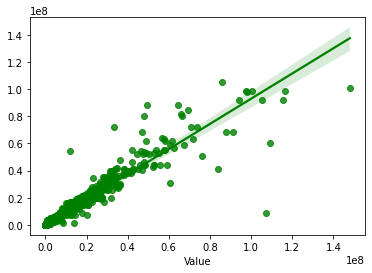

In [53]:
sns.regplot(x = y_test, y = y_pred, color = 'green')

In [54]:
feature_names = list(X.columns)

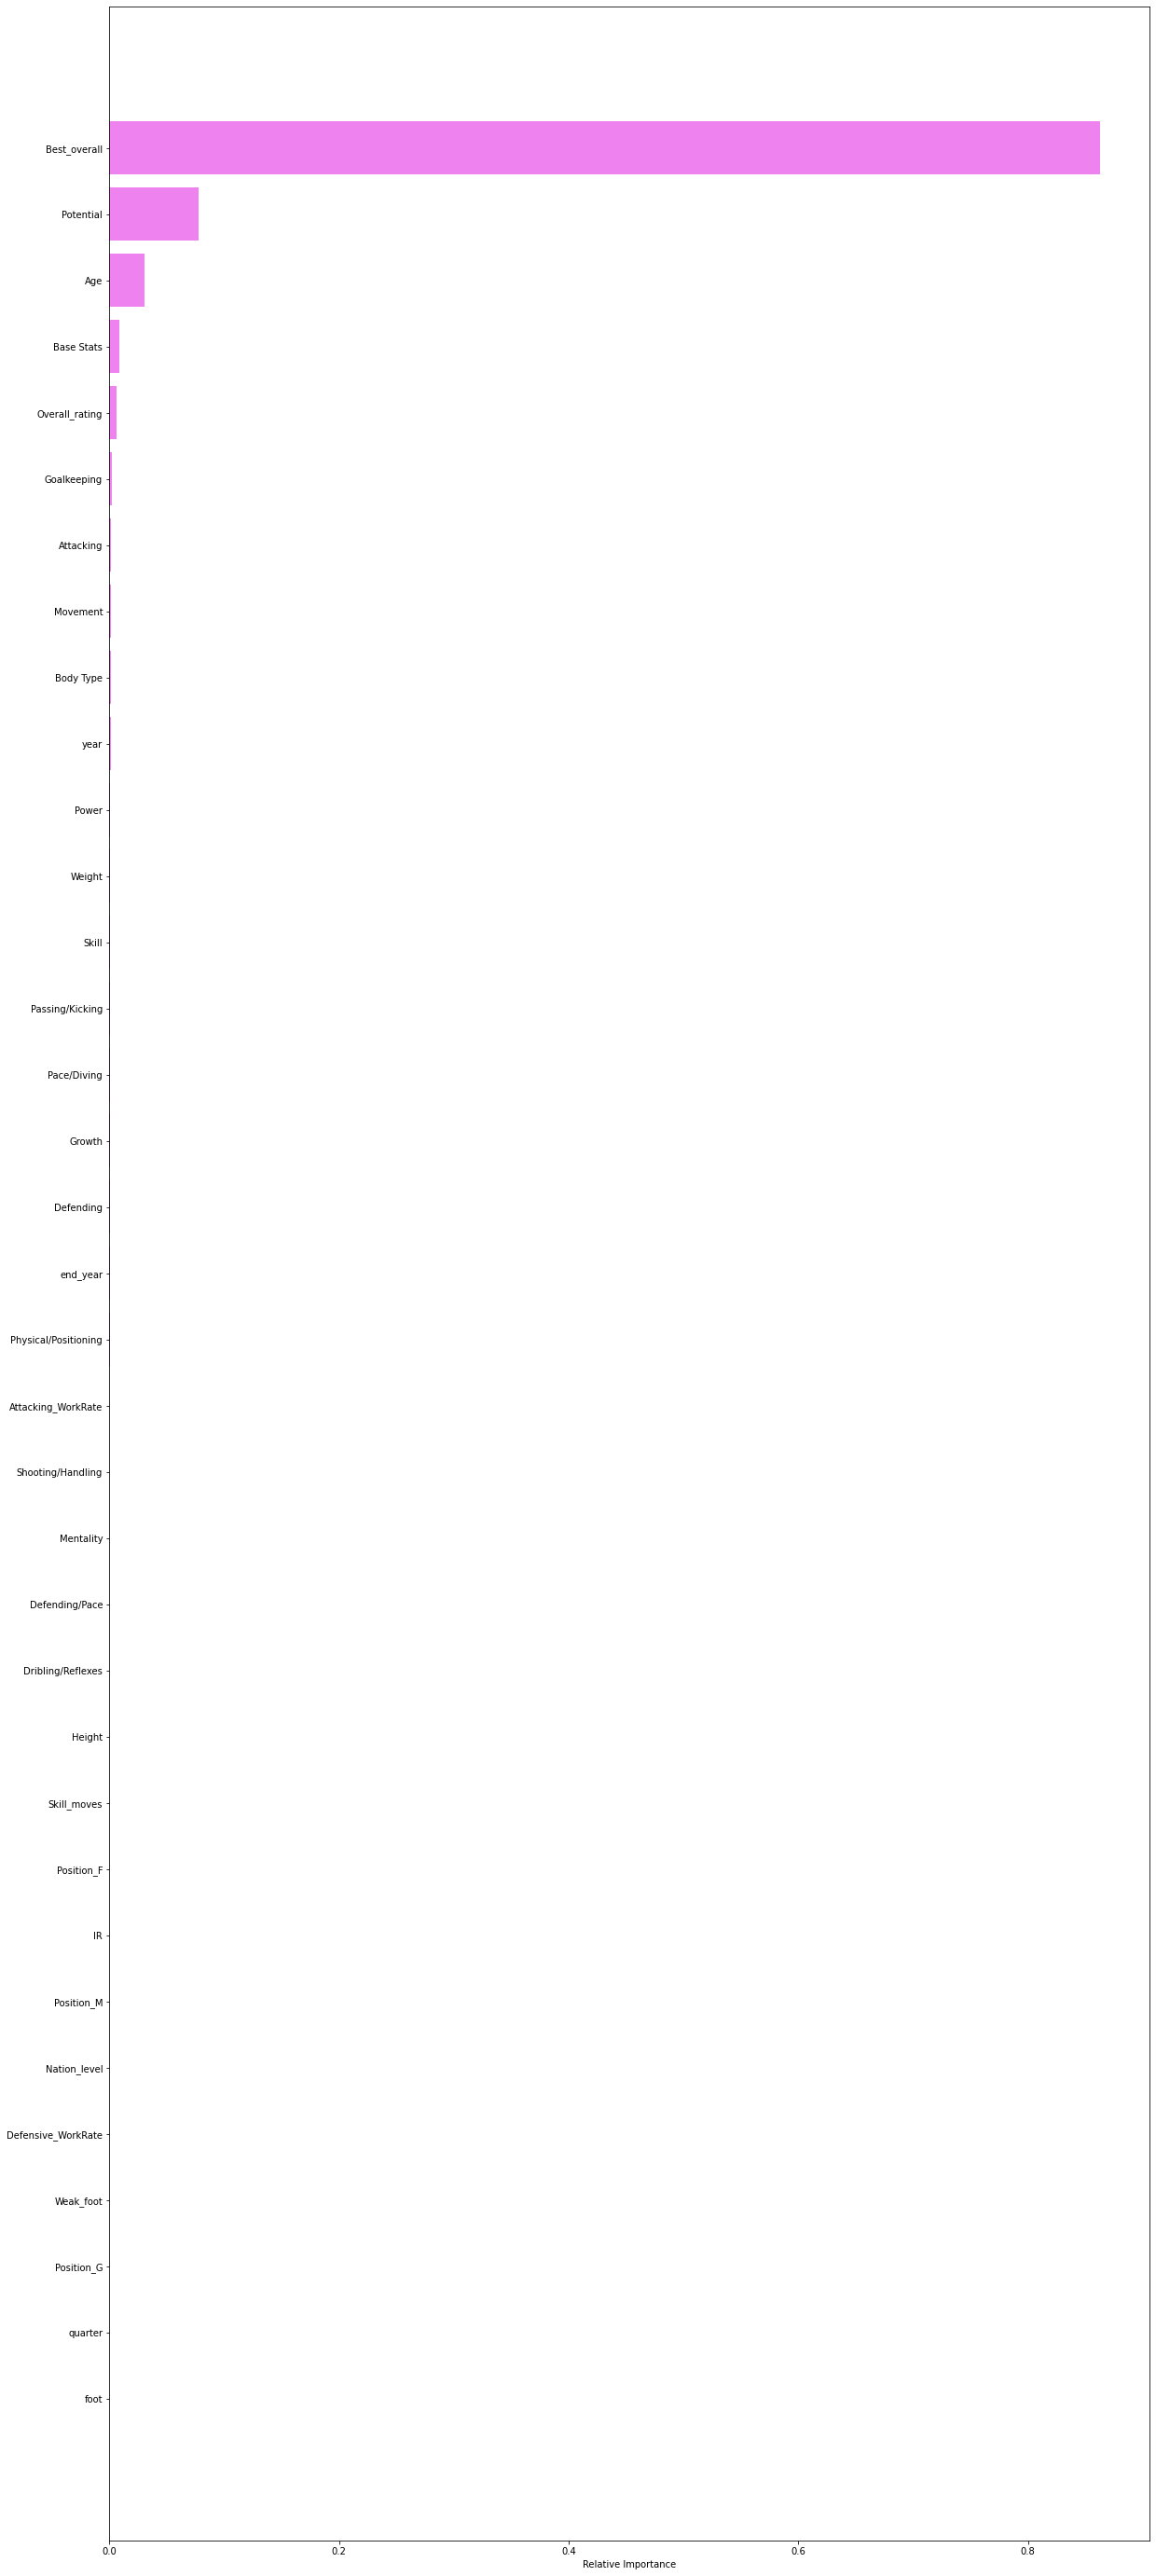

In [55]:
importances = dt.feature_importances_
plt.figure(figsize=(20,50))
indices = np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],color = 'violet',align = 'center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [56]:
#XGboost

In [57]:
# Apply Yeo-Johnson transformer

#pt5 = PowerTransformer()

#X_train_transformed5 = pt5.fit_transform(x_train)
#X_test_transformed5 = pt5.transform(x_test)

xg = XGBRegressor()
xg.fit(x_train,y_train)

y_pred2 = xg.predict(x_test)

print(r2_score(y_test,y_pred2))

0.9787237833620835


In [58]:
y_pred3 = xg.predict(x_train)

In [59]:
r2_score(y_pred3, y_train)

0.9999472512142226

<AxesSubplot:xlabel='Value'>

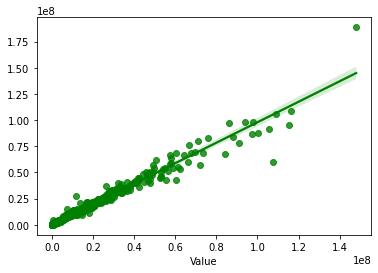

In [60]:
sns.regplot(x = y_test, y = y_pred2, color = 'green')

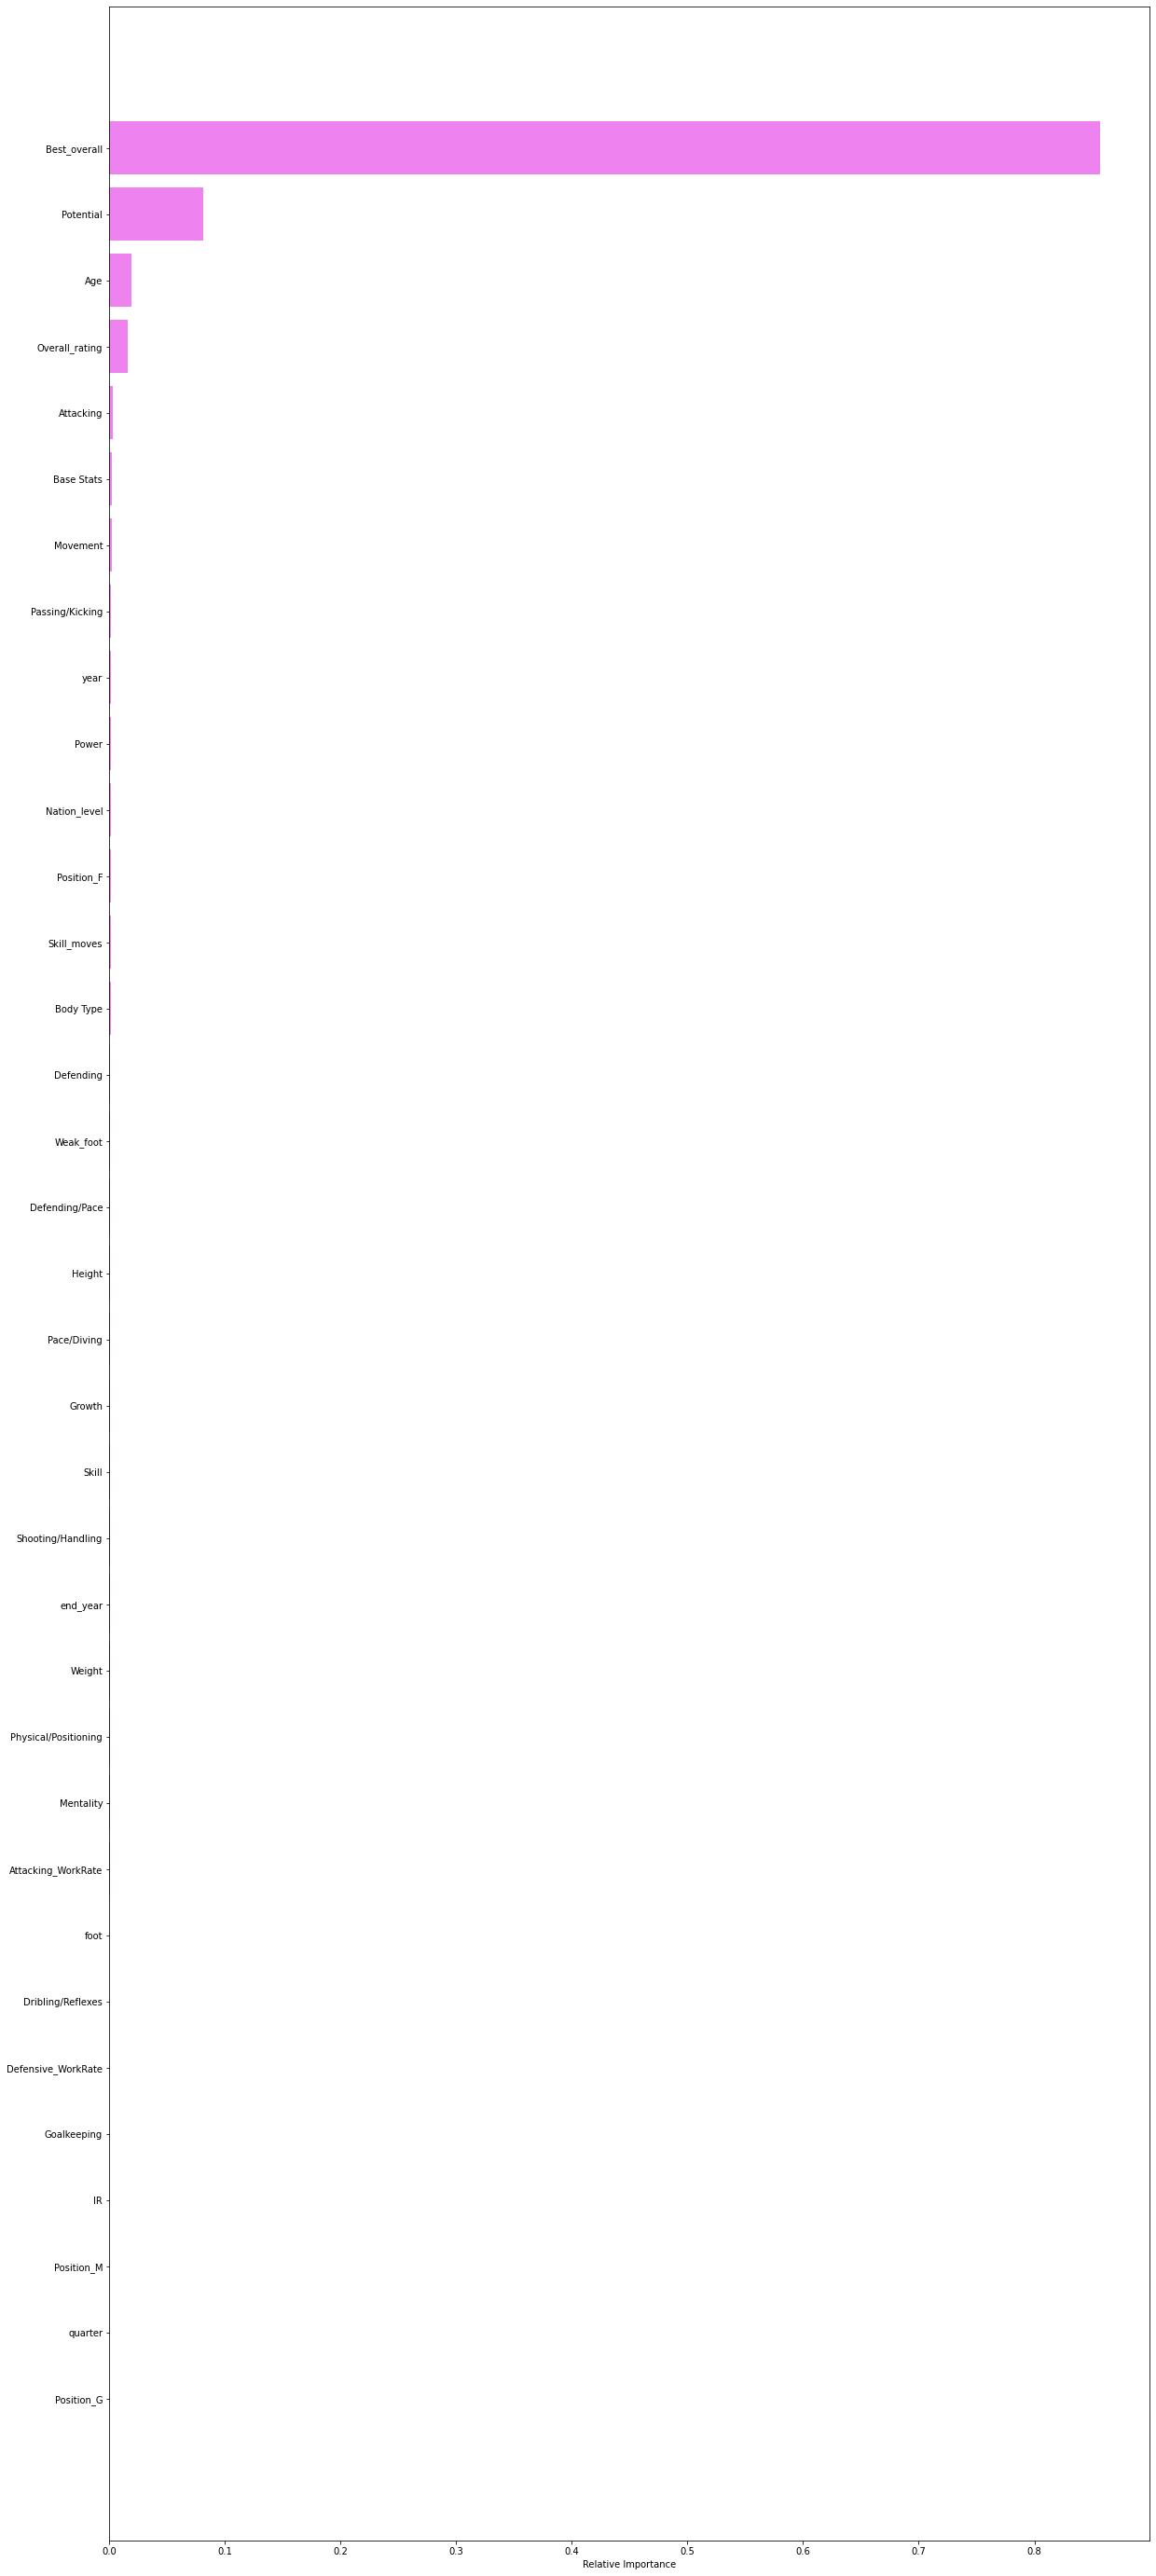

In [61]:
importances = xg.feature_importances_
plt.figure(figsize=(20,50))
indices = np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],color = 'violet',align = 'center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [62]:
#RFR
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42).fit(x_train,y_train)
y_pred9 = rfr.predict(x_test)

print(r2_score(y_test,y_pred9))

0.9652118279113698


In [63]:
y_pred0 = rfr.predict(x_train)
r2_score(y_pred0, y_train)

0.9926040519996209

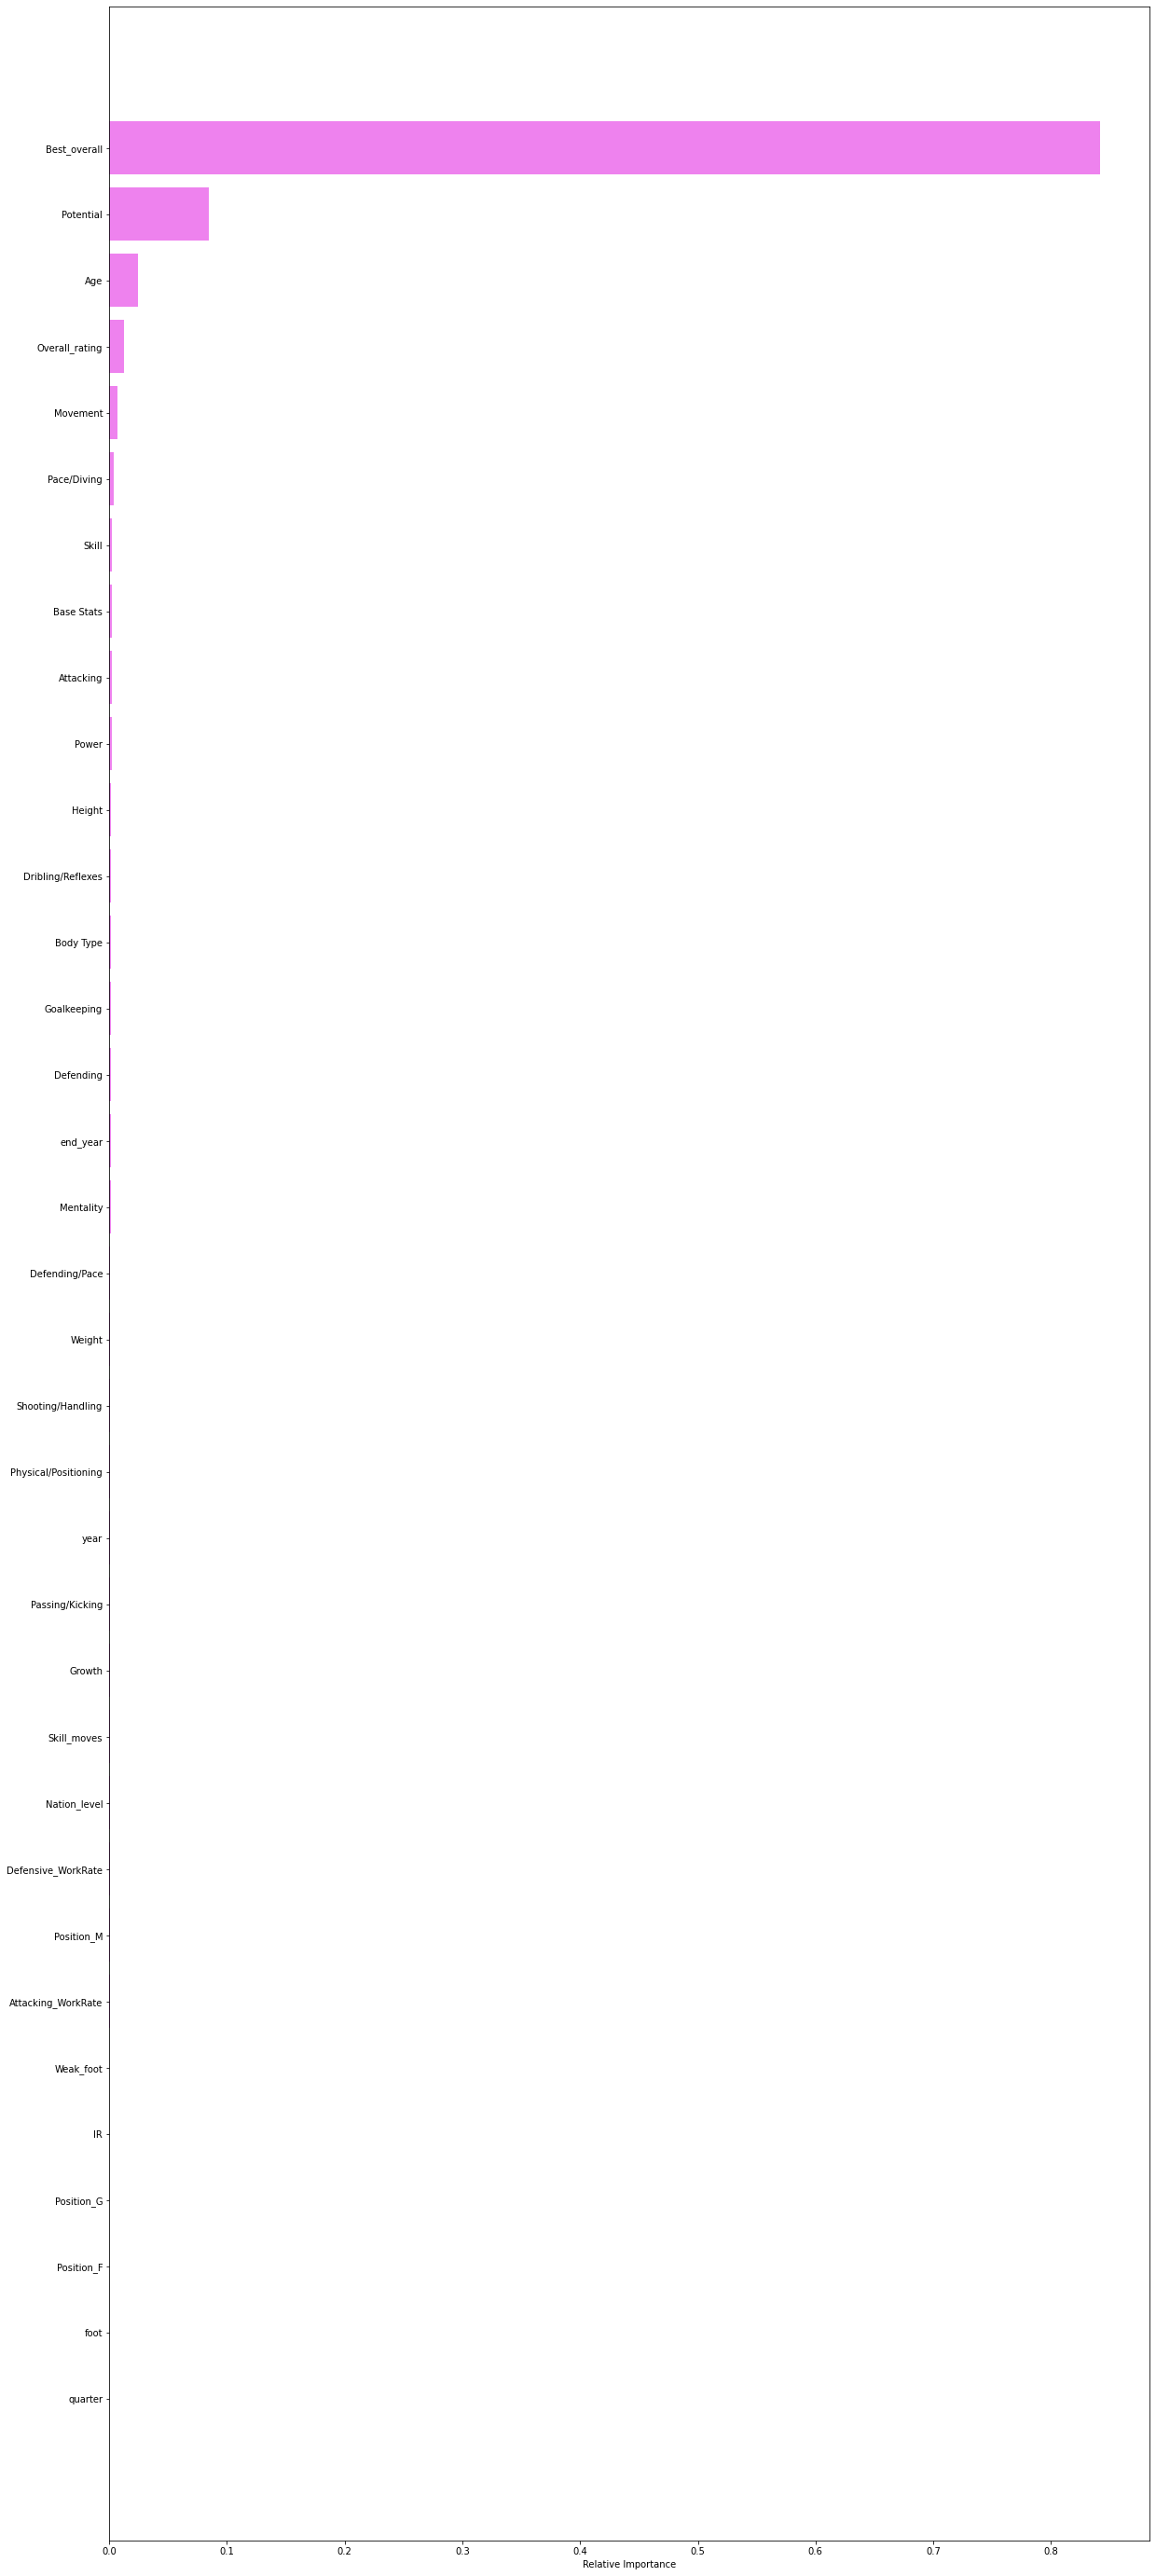

In [64]:
importances = rfr.feature_importances_
plt.figure(figsize=(20,50))
indices = np.argsort(importances)
plt.barh(range(len(indices)),importances[indices],color = 'violet',align = 'center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [65]:
df2=df1[['Best_overall','Overall_rating','Potential','Age','Value']]

In [66]:
df2

,Best_overall,Overall_rating,Potential,Age,Value
0,83,81,90,19,55500000.0
1,79,77,86,21,23500000.0
2,76,74,84,21,9500000.0
3,75,74,84,21,9500000.0
4,74,73,88,18,7000000.0
...,...,...,...,...,...
17029,67,65,73,22,1600000.0
17030,74,73,76,24,3800000.0
17031,69,69,72,25,1400000.0
17032,60,58,66,21,425000.0


In [67]:
df2.duplicated().sum()

6812

In [70]:
dup = df2[df2.duplicated(['Best_overall','Overall_rating','Potential','Age'])]

In [71]:
dup

,Best_overall,Overall_rating,Potential,Age,Value
36,84,82,88,22,44500000.0
48,81,79,89,22,39500000.0
56,84,84,88,22,57000000.0
78,75,75,85,19,11500000.0
103,82,80,86,23,33500000.0
...,...,...,...,...,...
17029,67,65,73,22,1600000.0
17030,74,73,76,24,3800000.0
17031,69,69,72,25,1400000.0
17032,60,58,66,21,425000.0


In [72]:
drop_list=list(dup.index)

In [73]:
df2.drop(drop_list, axis = 0, inplace = True)

In [74]:
df2

,Best_overall,Overall_rating,Potential,Age,Value
0,83,81,90,19,55500000.0
1,79,77,86,21,23500000.0
2,76,74,84,21,9500000.0
3,75,74,84,21,9500000.0
4,74,73,88,18,7000000.0
...,...,...,...,...,...
17001,59,60,71,18,325000.0
17006,56,57,66,20,140000.0
17018,61,62,81,17,550000.0
17020,53,54,62,21,100000.0


In [75]:
df2=df2.reset_index()

In [76]:
df2

,index,Best_overall,Overall_rating,Potential,Age,Value
0,0,83,81,90,19,55500000.0
1,1,79,77,86,21,23500000.0
2,2,76,74,84,21,9500000.0
3,3,75,74,84,21,9500000.0
4,4,74,73,88,18,7000000.0
...,...,...,...,...,...,...
7159,17001,59,60,71,18,325000.0
7160,17006,56,57,66,20,140000.0
7161,17018,61,62,81,17,550000.0
7162,17020,53,54,62,21,100000.0


In [77]:
df2.drop('index',axis=1,inplace=True)

In [78]:
df2

,Best_overall,Overall_rating,Potential,Age,Value
0,83,81,90,19,55500000.0
1,79,77,86,21,23500000.0
2,76,74,84,21,9500000.0
3,75,74,84,21,9500000.0
4,74,73,88,18,7000000.0
...,...,...,...,...,...
7159,59,60,71,18,325000.0
7160,56,57,66,20,140000.0
7161,61,62,81,17,550000.0
7162,53,54,62,21,100000.0


In [79]:
#df2.to_csv('n2.csv',index=False)

In [96]:
import copy

In [97]:
df3=copy.deepcopy(df2)

In [116]:
df3

,Best_overall,Overall_rating,Potential,Age,Value
0,83,81,90,19,55500000.0
1,79,77,86,21,23500000.0
2,76,74,84,21,9500000.0
3,75,74,84,21,9500000.0
4,74,73,88,18,7000000.0
...,...,...,...,...,...
7159,59,60,71,18,325000.0
7160,56,57,66,20,140000.0
7161,61,62,81,17,550000.0
7162,53,54,62,21,100000.0


In [117]:
#df3.to_csv('fifa_model.csv',index=False)

In [99]:
X = df3.drop('Value',axis=1)
Y = df3['Value']

In [100]:
X

,Best_overall,Overall_rating,Potential,Age
0,83,81,90,19
1,79,77,86,21
2,76,74,84,21
3,75,74,84,21
4,74,73,88,18
...,...,...,...,...
7159,59,60,71,18
7160,56,57,66,20
7161,61,62,81,17
7162,53,54,62,21


In [101]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [102]:
#Model

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
# Apply Yeo-Johnson transformer

#pt = PowerTransformer()

#X_train_transformed = pt.fit_transform(x_train)
#X_test_transformed = pt.transform(x_test)

dt1 = DecisionTreeRegressor(random_state=42).fit(x_train,y_train)

y_pred = dt1.predict(x_test)

print(r2_score(y_test,y_pred))

0.966259566539723


In [91]:
dt1.predict([[82,76,86,18]])

array([33000000.])

In [92]:
y_pred1 = dt1.predict(x_train)

In [93]:
r2_score(y_pred1, y_train)

0.9999999369866371

In [94]:
#Cross val score
dt1 = DecisionTreeRegressor(random_state=42)
np.mean(cross_val_score(dt,X,Y,scoring='r2'))

0.8758338920911749

In [108]:
from sklearn.ensemble import RandomForestRegressor
rfr1 = RandomForestRegressor(n_estimators = 100, random_state = 42).fit(x_train,y_train)
y_pred7 = rfr1.predict(x_test)

print(r2_score(y_test,y_pred7))

0.9800364057615119


In [109]:
y_pred8 = rfr1.predict(x_train)

In [110]:
r2_score(y_pred8, y_train)

0.9961631031774816

In [111]:
#Cross val score
rf = RandomForestRegressor(random_state=42)
np.mean(cross_val_score(rf,X,Y,scoring='r2'))

0.9392665861561913

In [ ]:
#XGB

In [113]:
xg1 = XGBRegressor().fit(x_train,y_train)
y_pr = xg1.predict(x_test)
print(r2_score(y_test,y_pr))

0.9648023518971167


In [114]:
y_pr1 = xg1.predict(x_train)
r2_score(y_pr1, y_train)

0.9996764097027615

In [115]:
#Cross val score
x1 = XGBRegressor(random_state=42)
np.mean(cross_val_score(x1,X,Y,scoring='r2'))

0.9393991523424301

In [204]:
import pickle

In [205]:
#
pickle.dump(rfr,open('model2.pkl', 'wb'))